# Growing Neural Gas 

A classical neural network that learns the topologies in data and creates a graph based on the topologies. 

Uses the FeatureGraph (see the repo) for the generic graph features. Clone the FeatureGraph .py files to FeatureGraph subfolder.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import os
from IPython.display import clear_output
from sklearn import datasets

from GrowingNeuralGas import GrowingNeuralGas
from FeatureGraph.graph import Graph

## Generate dataset

In [3]:
#file_path1 = 'C:\GNG2\mapdata\ku2022_1\map3.csv'
file_path2 = 'C:\ku2022_1\ku2022_16_absproxopt.csv'
file_path3 = 'C:/GNG2/travepoint/ku2022_16_travpoint/ku2022_16_trav_point_grid3.csv'

df1 = pd.read_csv(file_path3)
df2 = pd.read_csv(file_path2)
#df2 = pd.read_csv(file_path2)
#pg = df1.iloc[:,[2,3]].to_numpy()
trav = df1.iloc[:,[1,2]].to_numpy()
prox =  df2.iloc[:,[2,3]].to_numpy()
#dataset = np.concatenate((pg, prox), axis=0)
#result = pd.concat([pg, prox], axis=1).fillna(0).to_numpy()
dataset = trav

#data =np.split(result, 2, axis=1)
#dataset = np.vstack(data)
print(dataset)

[[ -32 -155]
 [ -31 -150]
 [ -30 -149]
 ...
 [ 125 -145]
 [ 125 -144]
 [ 126 -147]]


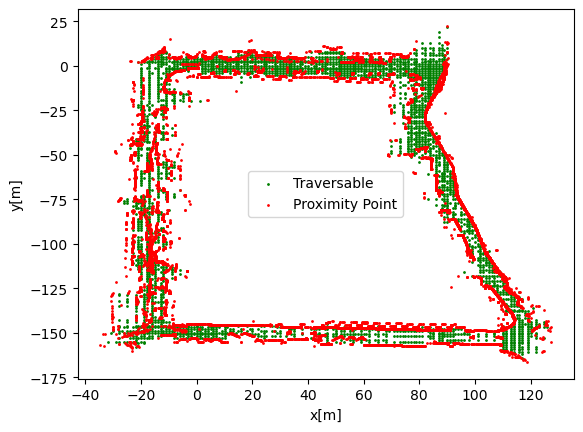

In [4]:
#plt.scatter(*pg.to_numpy().T)
#plt.scatter(*prox.to_numpy().T)
plt.scatter(*dataset.T, s=1, c='green', label='Traversable')
plt.scatter(*prox.T, s=1, c='red',label='Proximity Point')
plt.legend(loc = 'best')
plt.xlabel('x[m]')
plt.ylabel('y[m]')
plt.savefig('C:/GNG2/mapdata/result/ku2022_11/Trave11_grid3.png')

## Define plotting function for visualizing the graph fitting 

In [5]:

def gng_plotter(dataset : np.ndarray, graph : Graph, iteration : int) -> None: 
        """
        Function to plot the dataset data points and the growing neural gas (GNG) graph. 
        """
        # Get all GNG graph vertex vectors
        vertex_keys = graph.get_vertices()
        vertex_vectors = []
        for key in vertex_keys: 
            vertex_vect = graph.get_vertex_param(key=key, param_key='feature_vector')        
            vertex_vectors.append(vertex_vect)
        vertex_vectors = np.array(vertex_vectors)

        # Get edge end points
        line_points = []
        for key_a in vertex_keys:
            neighbors = graph.get_edges(key_a)['out'] # edges_out 
            vect_a = graph.get_vertex_param(key=key_a, param_key='feature_vector') 
            for key_b in neighbors: 
                vect_b = graph.get_vertex_param(key=key_b, param_key='feature_vector') 
                line_points.append([vect_a, vect_b])

        # Setup image
        clear_output(wait=True) # Clear the previous output in jupyter notebook        
        fig = plt.figure(figsize=(8, 8))
        ax = fig.add_subplot(111)
        ax.set_aspect('equal')
        
        # Plot dataset points
        #plt.scatter(dataset[:, 0], dataset[:, 1], s=10, c='blue', alpha=0.2, label='Map Data')
        plt.scatter(dataset[:, 0], dataset[:, 1], s=1, c='green', alpha=0.5, label='Traversable')
        plt.scatter(*prox.T, s=1, c = 'red', alpha = 0.5, label='Proximity Point')         
        # Plot GNG edges
        for vect_pair in line_points: 
            a_x = vect_pair[0][0]
            a_y = vect_pair[0][1]
            b_x = vect_pair[1][0]
            b_y = vect_pair[1][1]
            plt.plot([a_x, b_x], [a_y, b_y], c='black', alpha=0.5)

        # Plot GNG vertices
        plt.scatter(vertex_vectors[:, 0], vertex_vectors[:, 1], s=3, c='black', alpha=1, label='Nodes')

        plt.title('Iteration ' + str(iteration))
        plt.xlabel('x[m]')
        plt.ylabel('y[m]')        
        plt.legend(loc = 'best')
        if iteration == 50000 :
            plt.savefig('C:/GNG2/mapdata/result/ku2022_11/GNG_Grid3_withoutsampling'+ str(iteration))
        plt.show()
        

        

## Create the Growing Neural Gas graph and fit it to the MAP data

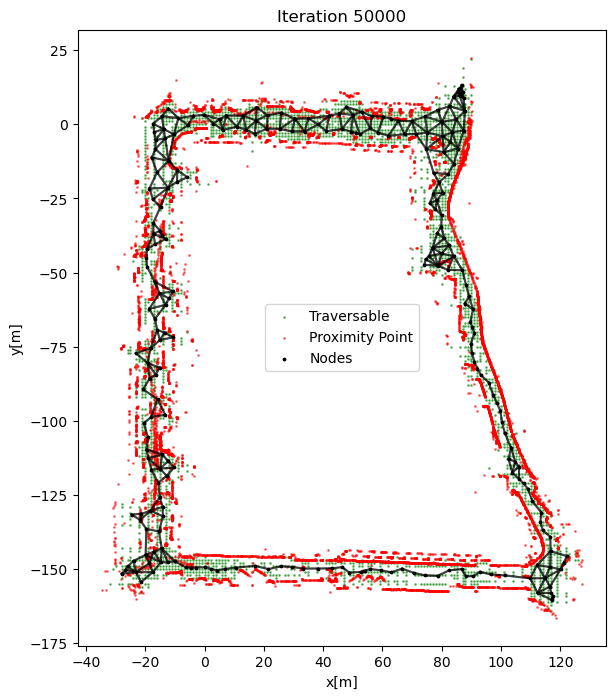

In [6]:
gng = GrowingNeuralGas(feature_dim=2)
gng.fit(dataset=dataset, 
        iterations=50000, 
        winner_upd_coeff=0.02,
        neighbor_upd_coeff=0.0005,
        max_vertex=1000, 
        vertex_insert_interval=200,
        vertex_insert_error_scaling=0.5,
        edge_age_limit=100,
        plot_interval=5000,
        plot_function=gng_plotter)

## gng node distribution

In [70]:
vertex_keys = gng.graph.get_vertices()
vertex_vectors = []
for key in vertex_keys: 
    vertex_vect = gng.graph.get_vertex_param(key=key, param_key='feature_vector')        
    vertex_vectors.append(vertex_vect)
vertex_vectors = np.array(vertex_vectors)
print(vertex_vectors.shape)
print(vertex_vectors)



(127, 2)
[[-1.28104459e+01 -8.29932230e+00]
 [ 1.24284934e+01 -2.06613857e+01]
 [-6.14815802e-03  2.18090295e-02]
 [ 1.70879254e+01 -4.67581770e+00]
 [ 5.80644036e+00 -2.02116148e+01]
 [ 3.19872845e+00  9.43267451e-02]
 [-9.36960216e+00 -1.87573303e+01]
 [ 1.70231541e+01 -1.24079750e+01]
 [-1.18643134e+01 -5.48016820e+00]
 [ 1.25654880e+01 -3.91473697e-01]
 [-3.40907437e+00 -1.97323144e+01]
 [ 1.71115337e+01 -1.61266112e+01]
 [-4.03331379e+00 -9.90055204e-02]
 [-1.28449219e+01 -1.55775217e+01]
 [ 7.43288722e+00 -2.78619438e-01]
 [ 6.52536306e-01 -2.00260261e+01]
 [ 1.71677962e+01 -7.31779426e+00]
 [ 1.50382957e+01 -2.04579324e+01]
 [-7.52288941e+00 -1.20816630e+00]
 [-1.30318839e+01 -1.30281412e+01]
 [ 8.09285681e+00 -2.02913965e+01]
 [ 1.47539330e+01 -7.41174689e-01]
 [ 1.45736516e+00  7.85342923e-02]
 [-7.00279383e+00 -1.93112045e+01]
 [-9.55944234e+00 -2.55145559e+00]
 [ 2.98867104e+00 -2.01465402e+01]
 [ 1.01196079e+01 -3.40624944e-01]
 [ 1.69150338e+01 -1.78135307e+01]
 [-1.297863

## GNG EDGE INFO

In [ ]:
line_points = []
for key_a in vertex_keys:
    neighbors = gng.graph.get_edges(key_a)['out']
    vect_a = gng.graph.get_vertex_param(key=key_a, param_key='feature_vector') 
    for key_b in neighbors: 
        vect_b = gng.graph.get_vertex_param(key=key_b, param_key='feature_vector') 
        line_points.append([vect_a, vect_b])

print(line_points)

In [56]:
errors = []

for key in vertex_keys:
    error = gng.graph.get_vertex_param(key=key, param_key='error')
    vect_a = gng.graph.get_vertex_param(key=key, param_key='feature_vector') 
    errors.append([vect_a, error]) 

print(errors)
#print(total_error)

[[array([-8.67169604, -1.88379446]), 0.7469486936017837], [array([17.13997243, -5.26220353]), 1.206865199889429], [array([0.03908041, 0.00854517]), 1.0802093783438935], [array([  9.94835711, -20.44245243]), 0.6024526199023496], [array([ -3.50185522, -19.71769268]), 0.5212421725705452], [array([14.27757324, -0.54090669]), 0.9165036914905627], [array([-12.05544588, -17.27762524]), 0.9934274305283555], [array([ 17.07590375, -16.81599594]), 0.5989361268830888], [array([-12.97208086, -10.65761006]), 0.6373662060743855], [array([3.23746337, 0.08187175]), 0.8577264824463368], [array([  4.59369038, -20.1960135 ]), 0.7116440509342904], [array([ 17.01108291, -13.28553369]), 0.5299515209291445], [array([-12.14913599,  -6.09806238]), 0.7503676984927033], [array([ -6.46309717, -19.3896698 ]), 0.74921979141437], [array([ 7.79362981, -0.28317456]), 0.9404714096989716], [array([-5.83172964, -0.54238121]), 1.0750800067084203], [array([ 12.96496415, -20.71481165]), 0.6304276044553684], [array([  0.72504